In [10]:
import os

base_dir = '/kaggle/input/leaf-disease-data/All_dataset/Plant_Diseases_Dataset'
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'valid')




hello


In [12]:
class_names = os.listdir(train_dir)
num_classes = len(class_names)
print(f"Number of classes: {num_classes}")
print(f"Class names: {class_names}")


Number of classes: 19
Class names: ['Tomato___Late_blight', 'Tomato___healthy', 'Tomato___Spider_mites_Two-spotted_spider_mite', 'Potato___healthy', 'Tomato___Early_blight', 'Tomato___Septoria_leaf_spot', 'Groundnut_rust', 'Groundnut_nutrition_deficiency', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', 'Groundnut_early_leaf_spot', 'Tomato___Target_Spot', 'Groundnut_healthy_leaf', 'Potato___Late_blight', 'Tomato___Tomato_mosaic_virus', 'Groundnut_early_rust', 'Potato___Early_blight', 'Tomato___Leaf_Mold', 'Groundnut_late_leaf_spot']


In [15]:
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

# Define image transformations
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # ViT requires 224x224 input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

valid_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Load datasets
train_dataset = ImageFolder(root=train_dir, transform=train_transforms)
valid_dataset = ImageFolder(root=valid_dir, transform=valid_transforms)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=16, shuffle=False)

num_classes = len(train_dataset.classes)  # Ensure it matches your dataset
print(f"Classes: {train_dataset.classes}")


Classes: ['Groundnut_early_leaf_spot', 'Groundnut_early_rust', 'Groundnut_healthy_leaf', 'Groundnut_late_leaf_spot', 'Groundnut_nutrition_deficiency', 'Groundnut_rust', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites_Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


In [19]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
from transformers import ViTForImageClassification

# Define device (use GPU if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load pretrained ViT model
num_classes = 19  # Change this to match your dataset's number of classes
model = ViTForImageClassification.from_pretrained(
    'google/vit-base-patch16-224-in21k',
    num_labels=num_classes
).to(device)

# Print model architecture to confirm
print(model)


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTSdpaAttention(
            (attention): ViTSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_fe

 Prepare Dataset

In [21]:
# Dataset directories
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'valid')
 
# Define image transformations
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

valid_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Load datasets
train_dataset = datasets.ImageFolder(train_dir, transform=train_transforms)
valid_dataset = datasets.ImageFolder(valid_dir, transform=valid_transforms)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=16, shuffle=False)

# Class names
class_names = train_dataset.classes
print(f"Classes: {class_names}")


Classes: ['Groundnut_early_leaf_spot', 'Groundnut_early_rust', 'Groundnut_healthy_leaf', 'Groundnut_late_leaf_spot', 'Groundnut_nutrition_deficiency', 'Groundnut_rust', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites_Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


In [22]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=1e-4)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    train_loss = 0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()  # Clear gradients
        outputs = model(images).logits  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights

        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss/len(train_loader):.4f}, Accuracy: {train_accuracy:.2f}%")


Epoch [1/10], Loss: 0.2928, Accuracy: 94.85%
Epoch [2/10], Loss: 0.0572, Accuracy: 98.49%
Epoch [3/10], Loss: 0.0385, Accuracy: 98.85%
Epoch [4/10], Loss: 0.0339, Accuracy: 99.10%
Epoch [5/10], Loss: 0.0369, Accuracy: 99.00%
Epoch [6/10], Loss: 0.0252, Accuracy: 99.33%
Epoch [7/10], Loss: 0.0315, Accuracy: 99.10%
Epoch [8/10], Loss: 0.0208, Accuracy: 99.38%
Epoch [9/10], Loss: 0.0198, Accuracy: 99.42%
Epoch [10/10], Loss: 0.0242, Accuracy: 99.35%


In [23]:
model.eval()  # Set model to evaluation mode
correct = 0
total = 0

with torch.no_grad():
    for images, labels in valid_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images).logits
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

validation_accuracy = 100 * correct / total
print(f"Validation Accuracy: {validation_accuracy:.2f}%")


Validation Accuracy: 78.58%


In [25]:
model.save_pretrained('./vit_fine_tuned_model')


In [26]:
import shutil

# Compress the model folder into a zip file
shutil.make_archive('/kaggle/working/vit_fine_tuned_model', 'zip', '/kaggle/working/vit_fine_tuned_model')


'/kaggle/working/vit_fine_tuned_model.zip'

In [28]:
from transformers import ViTForImageClassification

# Load the fine-tuned model
model = ViTForImageClassification.from_pretrained('./vit_fine_tuned_model')
model.to(device)


ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTSdpaAttention(
            (attention): ViTSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_fe

In [29]:
import torch
from tqdm import tqdm

# Metrics containers
valid_losses = []
valid_accuracies = []

# Switch to evaluation mode
model.eval()
criterion = torch.nn.CrossEntropyLoss()

total = 0
correct = 0
with torch.no_grad():
    for images, labels in tqdm(valid_loader):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images).logits
        loss = criterion(outputs, labels)

        # Collect loss
        valid_losses.append(loss.item())

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Calculate final metrics
avg_valid_loss = sum(valid_losses) / len(valid_losses)
valid_accuracy = 100 * correct / total

print(f"Validation Loss: {avg_valid_loss:.4f}")
print(f"Validation Accuracy: {valid_accuracy:.2f}%")


100%|██████████| 800/800 [03:00<00:00,  4.43it/s]

Validation Loss: 1.1260
Validation Accuracy: 78.58%


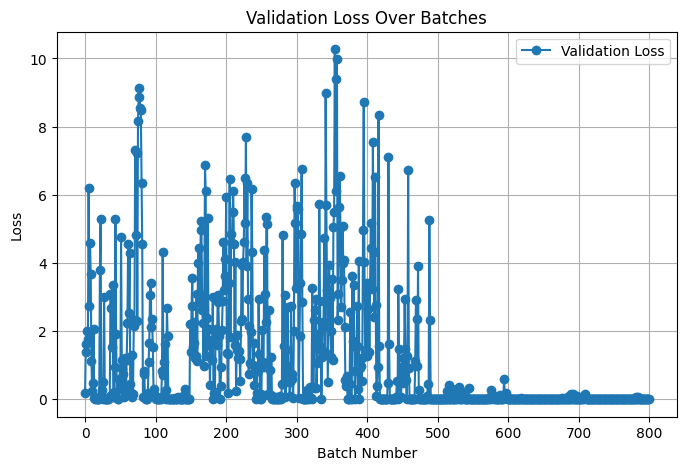

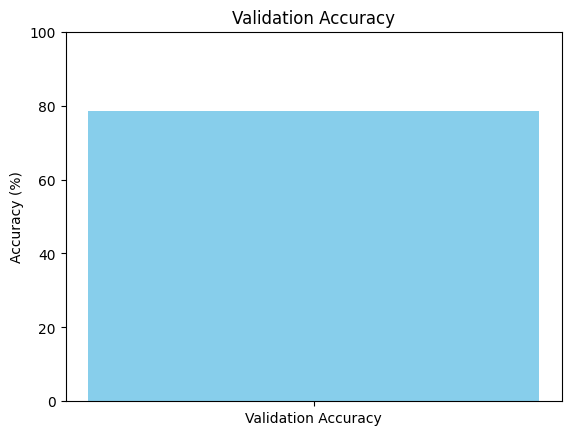

In [30]:
import matplotlib.pyplot as plt

# Validation loss plot
plt.figure(figsize=(8, 5))
plt.plot(valid_losses, label='Validation Loss', marker='o')
plt.title('Validation Loss Over Batches')
plt.xlabel('Batch Number')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Validation accuracy
plt.bar(['Validation Accuracy'], [valid_accuracy], color='skyblue')
plt.title('Validation Accuracy')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.show()


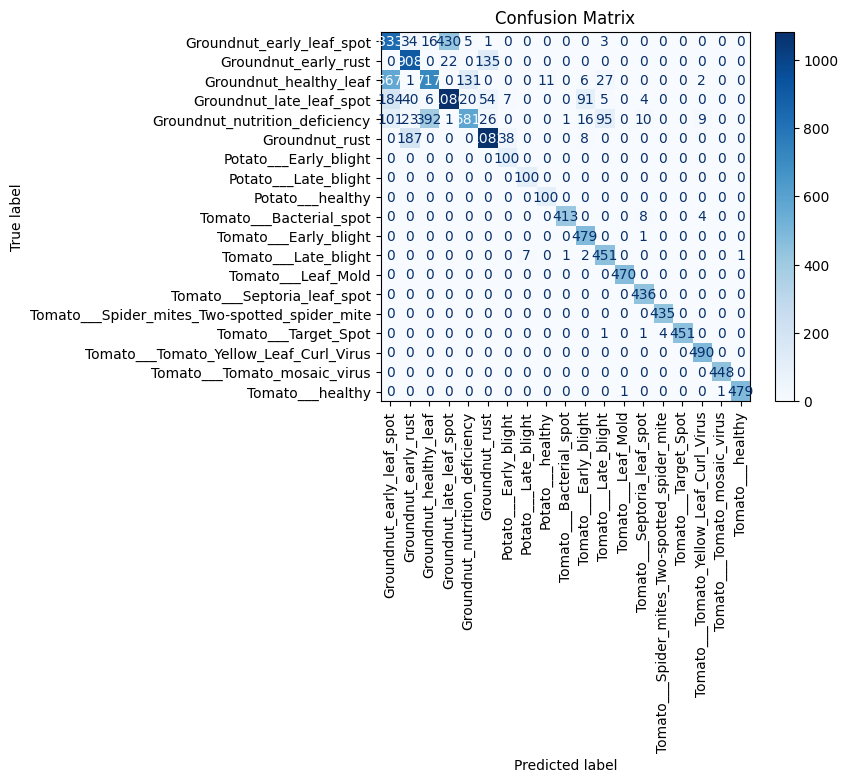

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

all_preds = []
all_labels = []
model.eval()
with torch.no_grad():
    for images, labels in valid_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images).logits
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds, labels=np.arange(num_classes))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()
